**Rohan Nyati , R177219148**

In [2]:
import numpy as np
import pandas as pd
df=pd.read_csv('winequality-red.csv')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
df.isnull().any(axis=0)   

fixed acidity           False
volatile acidity        False
citric acid             False
residual sugar          False
chlorides               False
free sulfur dioxide     False
total sulfur dioxide    False
density                 False
pH                      False
sulphates               False
alcohol                 False
quality                 False
dtype: bool

In [5]:
df.isnull().any(axis=1)     

0       False
1       False
2       False
3       False
4       False
        ...  
1594    False
1595    False
1596    False
1597    False
1598    False
Length: 1599, dtype: bool

In [6]:
df['quality'].unique() 

array([5, 6, 7, 4, 8, 3])

In [8]:
X=df.iloc[:,0:11].values
print(X)

[[ 7.4    0.7    0.    ...  3.51   0.56   9.4  ]
 [ 7.8    0.88   0.    ...  3.2    0.68   9.8  ]
 [ 7.8    0.76   0.04  ...  3.26   0.65   9.8  ]
 ...
 [ 6.3    0.51   0.13  ...  3.42   0.75  11.   ]
 [ 5.9    0.645  0.12  ...  3.57   0.71  10.2  ]
 [ 6.     0.31   0.47  ...  3.39   0.66  11.   ]]


In [9]:
y = df.iloc[:,11:12].values
print(y)

[[5]
 [5]
 [5]
 ...
 [6]
 [5]
 [6]]


In [10]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y, test_size=.20,random_state=42)

**Polynomial Linear Regression**

In [11]:
from sklearn.linear_model import LinearRegression


In [12]:
reg = LinearRegression().fit(X_train, y_train)
y_pred=reg.predict(X_test)

In [13]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.40318034127962155

**SVM**

In [14]:
from sklearn.svm import SVC
svm = SVC(kernel ="linear" , C =0.025, random_state = 42)
svm.fit(X_train,y_train)
y_pred = svm.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [15]:
from sklearn import  metrics
a=metrics.accuracy_score(y_test,y_pred)
print(a)

0.5625


 **Decision Tree**

In [16]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [19]:
y_pred = classifier.predict(X_test)
from sklearn import  metrics
b=metrics.accuracy_score(y_test,y_pred)
print(b)

0.575


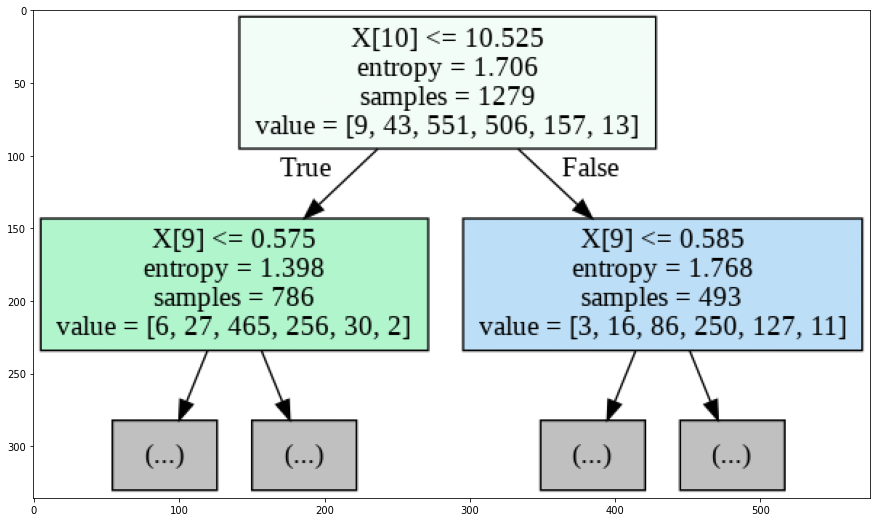

In [23]:
import matplotlib.pyplot as plt
from sklearn import tree
decision_tree=tree.export_graphviz(classifier,out_file='tree.dot',max_depth=1,filled=True)
!dot -Tpng tree.dot -otree.png
image = plt.imread('tree.png')
plt.figure(figsize=(15,10))
plt.imshow(image)